In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


# We will predict the number of suicides that may happen from population

In [2]:
df=pd.read_csv("../input/master.csv")
df.shape

(27820, 12)

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Observing some statistical data

In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# Checking for correlation

In [5]:
df.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


### We may note down the correlation score between population and suicides_no is 0.616162 which is somewhat significant

## Using inbuilt model for predictions

In [6]:
from sklearn.model_selection import train_test_split
x=df[["population"]]
y=df["suicides_no"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.30)


In [7]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
rmse_values = []
for k in range(150):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error =math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_values.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 948.2514450394528
RMSE value for k=  2 is: 858.5394325692725
RMSE value for k=  3 is: 825.9159132002649
RMSE value for k=  4 is: 789.2246994606994
RMSE value for k=  5 is: 776.3139230447139
RMSE value for k=  6 is: 766.6891142200554
RMSE value for k=  7 is: 759.1562319121558
RMSE value for k=  8 is: 753.9519658810952
RMSE value for k=  9 is: 751.7451733139917
RMSE value for k=  10 is: 744.7550460532324
RMSE value for k=  11 is: 735.1163715922831
RMSE value for k=  12 is: 733.4141928311295
RMSE value for k=  13 is: 732.6943085129259
RMSE value for k=  14 is: 730.2256335057264
RMSE value for k=  15 is: 726.6231731024847
RMSE value for k=  16 is: 725.176488982119
RMSE value for k=  17 is: 722.4973174629489
RMSE value for k=  18 is: 719.6646391968055
RMSE value for k=  19 is: 716.549326050732
RMSE value for k=  20 is: 713.3776550850527
RMSE value for k=  21 is: 712.2912144842502
RMSE value for k=  22 is: 712.2743083637788
RMSE value for k=  23 is: 712.8247150025524

In [9]:
min(rmse_values)

706.0683318427608

# The minimum RMSE value is 711.600 which is corressponding to K=23

Text(0, 0.5, 'RMSE')

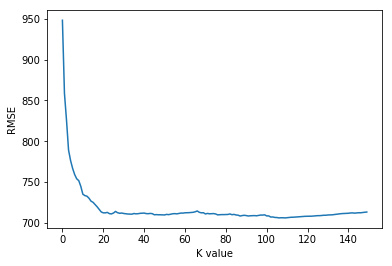

In [10]:
plt.plot(range(150),rmse_values)
plt.xlabel("K value")
plt.ylabel("RMSE")

# From the plot between RMSE and K-value we can observe and conclude that the optimal value of K will be something around K=20

In [11]:
predict=model.predict(x_test)

## Printing results

In [12]:
for i in range(len(predict)):
    print("For Population:",x_test.values[i])
    print("The expected number of suicides is :",predict[i])

For Population: [107634]
The expected number of suicides is : 16.813333333333333
For Population: [364000]
The expected number of suicides is : 50.7
For Population: [183629]
The expected number of suicides is : 44.873333333333335
For Population: [28664]
The expected number of suicides is : 3.1
For Population: [621226]
The expected number of suicides is : 62.653333333333336
For Population: [101951]
The expected number of suicides is : 15.553333333333333
For Population: [3743523]
The expected number of suicides is : 386.96666666666664
For Population: [1298840]
The expected number of suicides is : 176.80666666666667
For Population: [1035157]
The expected number of suicides is : 148.35333333333332
For Population: [531800]
The expected number of suicides is : 49.053333333333335
For Population: [3606800]
The expected number of suicides is : 351.84
For Population: [337800]
The expected number of suicides is : 39.14
For Population: [186300]
The expected number of suicides is : 44.78
For Populat

For Population: [2834100]
The expected number of suicides is : 287.4266666666667
For Population: [357334]
The expected number of suicides is : 44.74
For Population: [4914657]
The expected number of suicides is : 529.3133333333334
For Population: [586200]
The expected number of suicides is : 61.526666666666664
For Population: [322800]
The expected number of suicides is : 35.17333333333333
For Population: [126509]
The expected number of suicides is : 20.973333333333333
For Population: [20765]
The expected number of suicides is : 1.8866666666666667
For Population: [447404]
The expected number of suicides is : 57.66
For Population: [1855500]
The expected number of suicides is : 240.9
For Population: [229549]
The expected number of suicides is : 39.22
For Population: [1164937]
The expected number of suicides is : 174.09333333333333
For Population: [292637]
The expected number of suicides is : 27.56
For Population: [28100]
The expected number of suicides is : 2.8333333333333335
For Populatio

The expected number of suicides is : 44.026666666666664
For Population: [9780]
The expected number of suicides is : 0.5466666666666666
For Population: [147429]
The expected number of suicides is : 31.426666666666666
For Population: [1193029]
The expected number of suicides is : 174.83333333333334
For Population: [291345]
The expected number of suicides is : 29.313333333333333
For Population: [81225]
The expected number of suicides is : 11.76
For Population: [687593]
The expected number of suicides is : 106.0
For Population: [9580]
The expected number of suicides is : 0.5133333333333333
For Population: [445300]
The expected number of suicides is : 59.66
For Population: [3134518]
The expected number of suicides is : 303.2866666666667
For Population: [5556200]
The expected number of suicides is : 599.5333333333333
For Population: [536457]
The expected number of suicides is : 49.18666666666667
For Population: [1444622]
The expected number of suicides is : 255.85333333333332
For Population:

For Population: [1105530]
The expected number of suicides is : 179.94
For Population: [151300]
The expected number of suicides is : 34.06666666666667
For Population: [251089]
The expected number of suicides is : 37.693333333333335
For Population: [5661000]
The expected number of suicides is : 590.4466666666667
For Population: [20000]
The expected number of suicides is : 2.006666666666667
For Population: [7461480]
The expected number of suicides is : 939.7066666666667
For Population: [245043]
The expected number of suicides is : 40.806666666666665
For Population: [180100]
The expected number of suicides is : 45.08
For Population: [18183000]
The expected number of suicides is : 2933.9466666666667
For Population: [477076]
The expected number of suicides is : 43.22666666666667
For Population: [1739451]
The expected number of suicides is : 244.32666666666665
For Population: [373200]
The expected number of suicides is : 53.42
For Population: [1352245]
The expected number of suicides is : 226

The expected number of suicides is : 816.0666666666667
For Population: [28800]
The expected number of suicides is : 3.2466666666666666
For Population: [4935213]
The expected number of suicides is : 509.42
For Population: [287397]
The expected number of suicides is : 29.286666666666665
For Population: [4068675]
The expected number of suicides is : 337.04
For Population: [2308000]
The expected number of suicides is : 311.50666666666666
For Population: [52903]
The expected number of suicides is : 8.94
For Population: [5384313]
The expected number of suicides is : 567.1733333333333
For Population: [5145957]
The expected number of suicides is : 559.2666666666667
For Population: [503000]
The expected number of suicides is : 45.78
For Population: [20336031]
The expected number of suicides is : 2766.3333333333335
For Population: [1262327]
The expected number of suicides is : 164.72666666666666
For Population: [56276]
The expected number of suicides is : 9.593333333333334
For Population: [50159

The expected number of suicides is : 10.993333333333334
For Population: [58400]
The expected number of suicides is : 9.806666666666667
For Population: [300300]
The expected number of suicides is : 28.266666666666666
For Population: [1238772]
The expected number of suicides is : 167.14
For Population: [61600]
The expected number of suicides is : 9.173333333333334
For Population: [331912]
The expected number of suicides is : 37.34
For Population: [143703]
The expected number of suicides is : 28.82
For Population: [196877]
The expected number of suicides is : 50.013333333333335
For Population: [36325]
The expected number of suicides is : 5.1066666666666665
For Population: [359200]
The expected number of suicides is : 45.52
For Population: [14951]
The expected number of suicides is : 0.8466666666666667
For Population: [218168]
The expected number of suicides is : 41.60666666666667
For Population: [642167]
The expected number of suicides is : 63.38
For Population: [169250]
The expected numb

For Population: [83290]
The expected number of suicides is : 11.713333333333333
For Population: [9859]
The expected number of suicides is : 0.5466666666666666
For Population: [54852]
The expected number of suicides is : 8.9
For Population: [4229825]
The expected number of suicides is : 371.67333333333335
For Population: [31600]
The expected number of suicides is : 4.213333333333333
For Population: [1648400]
The expected number of suicides is : 228.39333333333335
For Population: [319105]
The expected number of suicides is : 35.43333333333333
For Population: [357715]
The expected number of suicides is : 45.63333333333333
For Population: [468892]
The expected number of suicides is : 47.2
For Population: [143100]
The expected number of suicides is : 28.4
For Population: [1277]
The expected number of suicides is : 0.11333333333333333
For Population: [202560]
The expected number of suicides is : 48.78
For Population: [24000]
The expected number of suicides is : 2.6333333333333333
For Populat

For Population: [52900]
The expected number of suicides is : 8.94
For Population: [991048]
The expected number of suicides is : 132.82666666666665
For Population: [614837]
The expected number of suicides is : 65.14666666666666
For Population: [308000]
The expected number of suicides is : 34.126666666666665
For Population: [1333]
The expected number of suicides is : 0.11333333333333333
For Population: [5520328]
The expected number of suicides is : 588.28
For Population: [216300]
The expected number of suicides is : 43.06666666666667
For Population: [10679730]
The expected number of suicides is : 1455.12
For Population: [123800]
The expected number of suicides is : 20.313333333333333
For Population: [6700]
The expected number of suicides is : 0.43333333333333335
For Population: [11676480]
The expected number of suicides is : 1703.4133333333334
For Population: [413552]
The expected number of suicides is : 46.593333333333334
For Population: [2427]
The expected number of suicides is : 0.146

For Population: [170190]
The expected number of suicides is : 37.74666666666667
For Population: [616600]
The expected number of suicides is : 62.873333333333335
For Population: [1486091]
The expected number of suicides is : 251.30666666666667
For Population: [204156]
The expected number of suicides is : 44.96666666666667
For Population: [97186]
The expected number of suicides is : 13.013333333333334
For Population: [1572683]
The expected number of suicides is : 237.00666666666666
For Population: [569000]
The expected number of suicides is : 43.81333333333333
For Population: [374887]
The expected number of suicides is : 57.72666666666667
For Population: [11292233]
The expected number of suicides is : 1644.12
For Population: [287900]
The expected number of suicides is : 29.22
For Population: [145200]
The expected number of suicides is : 29.58
For Population: [2481274]
The expected number of suicides is : 311.0133333333333
For Population: [290300]
The expected number of suicides is : 29.2

The expected number of suicides is : 286.4866666666667
For Population: [365982]
The expected number of suicides is : 50.64
For Population: [9153406]
The expected number of suicides is : 1234.3866666666668
For Population: [3164600]
The expected number of suicides is : 299.87333333333333
For Population: [586700]
The expected number of suicides is : 61.57333333333333
For Population: [243174]
The expected number of suicides is : 41.75333333333333
For Population: [424900]
The expected number of suicides is : 57.626666666666665
For Population: [1586738]
The expected number of suicides is : 249.44666666666666
For Population: [21700]
The expected number of suicides is : 1.9
For Population: [4195185]
The expected number of suicides is : 344.14
For Population: [370500]
The expected number of suicides is : 51.58
For Population: [742972]
The expected number of suicides is : 90.94
For Population: [3034314]
The expected number of suicides is : 306.31333333333333
For Population: [52238]
The expected 

The expected number of suicides is : 185.77333333333334
For Population: [96800]
The expected number of suicides is : 13.06
For Population: [1041]
The expected number of suicides is : 0.11333333333333333
For Population: [320318]
The expected number of suicides is : 35.34
For Population: [5919684]
The expected number of suicides is : 758.6933333333334
For Population: [38339600]
The expected number of suicides is : 3491.826666666667
For Population: [2798]
The expected number of suicides is : 0.21333333333333335
For Population: [9478566]
The expected number of suicides is : 1359.78
For Population: [6469621]
The expected number of suicides is : 829.5266666666666
For Population: [51466]
The expected number of suicides is : 8.253333333333334
For Population: [87600]
The expected number of suicides is : 12.233333333333333
For Population: [177524]
The expected number of suicides is : 44.45333333333333
For Population: [576100]
The expected number of suicides is : 53.0
For Population: [350500]
The

The expected number of suicides is : 0.7666666666666667
For Population: [1072711]
The expected number of suicides is : 155.2
For Population: [1431319]
The expected number of suicides is : 261.0733333333333
For Population: [8400500]
The expected number of suicides is : 1001.3866666666667
For Population: [5146300]
The expected number of suicides is : 559.2666666666667
For Population: [9063]
The expected number of suicides is : 0.47333333333333333
For Population: [12280]
The expected number of suicides is : 0.8666666666666667
For Population: [106200]
The expected number of suicides is : 17.206666666666667
For Population: [17000]
The expected number of suicides is : 1.2533333333333334
For Population: [20342901]
The expected number of suicides is : 2766.3333333333335
For Population: [7902]
The expected number of suicides is : 0.5133333333333333
For Population: [382139]
The expected number of suicides is : 57.78666666666667
For Population: [65284]
The expected number of suicides is : 9.54666

The expected number of suicides is : 380.6666666666667
For Population: [52339]
The expected number of suicides is : 8.96
For Population: [27300]
The expected number of suicides is : 2.9466666666666668
For Population: [760527]
The expected number of suicides is : 95.9
For Population: [5192621]
The expected number of suicides is : 578.0133333333333
For Population: [19657]
The expected number of suicides is : 1.94
For Population: [762841]
The expected number of suicides is : 97.77333333333333
For Population: [6325398]
The expected number of suicides is : 785.8133333333334
For Population: [1128429]
The expected number of suicides is : 184.34
For Population: [430726]
The expected number of suicides is : 57.50666666666667
For Population: [241393]
The expected number of suicides is : 40.63333333333333
For Population: [539721]
The expected number of suicides is : 46.95333333333333
For Population: [390756]
The expected number of suicides is : 51.81333333333333
For Population: [1547]
The expecte

The expected number of suicides is : 55.79333333333334
For Population: [1130700]
The expected number of suicides is : 187.10666666666665
For Population: [90600]
The expected number of suicides is : 12.22
For Population: [11354811]
The expected number of suicides is : 1645.78
For Population: [276408]
The expected number of suicides is : 31.393333333333334
For Population: [547000]
The expected number of suicides is : 46.42666666666667
For Population: [6444]
The expected number of suicides is : 0.42
For Population: [9114537]
The expected number of suicides is : 1234.22
For Population: [2709200]
The expected number of suicides is : 288.88
For Population: [27573]
The expected number of suicides is : 2.933333333333333
For Population: [509858]
The expected number of suicides is : 46.28
For Population: [8200]
The expected number of suicides is : 0.48
For Population: [2879432]
The expected number of suicides is : 280.66
For Population: [1036483]
The expected number of suicides is : 147.52
For P

For Population: [745157]
The expected number of suicides is : 93.43333333333334
For Population: [1275]
The expected number of suicides is : 0.11333333333333333
For Population: [4569482]
The expected number of suicides is : 453.3333333333333
For Population: [29185]
The expected number of suicides is : 3.5866666666666664
For Population: [509797]
The expected number of suicides is : 46.28
For Population: [146309]
The expected number of suicides is : 30.686666666666667
For Population: [390859]
The expected number of suicides is : 52.0
For Population: [10000163]
The expected number of suicides is : 1493.24
For Population: [860913]
The expected number of suicides is : 178.96
For Population: [47000]
The expected number of suicides is : 5.846666666666667
For Population: [270300]
The expected number of suicides is : 33.08
For Population: [542946]
The expected number of suicides is : 46.48
For Population: [248952]
The expected number of suicides is : 38.82666666666667
For Population: [1820274]
T

The expected number of suicides is : 38.42666666666667
For Population: [143055]
The expected number of suicides is : 28.406666666666666
For Population: [1364473]
The expected number of suicides is : 248.27333333333334
For Population: [560300]
The expected number of suicides is : 43.053333333333335
For Population: [546238]
The expected number of suicides is : 45.92666666666667
For Population: [126141]
The expected number of suicides is : 20.86
For Population: [8435]
The expected number of suicides is : 0.49333333333333335
For Population: [8801]
The expected number of suicides is : 0.4666666666666667
For Population: [86692]
The expected number of suicides is : 12.22
For Population: [643639]
The expected number of suicides is : 62.593333333333334
For Population: [446967]
The expected number of suicides is : 59.086666666666666
For Population: [249909]
The expected number of suicides is : 37.71333333333333
For Population: [838400]
The expected number of suicides is : 178.04
For Population: 

The expected number of suicides is : 0.42
For Population: [791509]
The expected number of suicides is : 132.29333333333332
For Population: [48581]
The expected number of suicides is : 7.2
For Population: [254800]
The expected number of suicides is : 34.446666666666665
For Population: [166424]
The expected number of suicides is : 37.48
For Population: [1021870]
The expected number of suicides is : 141.94666666666666
For Population: [3228500]
The expected number of suicides is : 309.3333333333333
For Population: [7239]
The expected number of suicides is : 0.4866666666666667
For Population: [19999]
The expected number of suicides is : 2.006666666666667
For Population: [2523100]
The expected number of suicides is : 309.4866666666667
For Population: [1223531]
The expected number of suicides is : 175.29333333333332
For Population: [6295000]
The expected number of suicides is : 781.1533333333333
For Population: [11082]
The expected number of suicides is : 0.62
For Population: [61525]
The expe

For Population: [8537]
The expected number of suicides is : 0.49333333333333335
For Population: [366100]
The expected number of suicides is : 50.526666666666664
For Population: [115500]
The expected number of suicides is : 19.8
For Population: [27049]
The expected number of suicides is : 2.94
For Population: [1106280]
The expected number of suicides is : 179.94
For Population: [8751380]
The expected number of suicides is : 978.3733333333333
For Population: [1807]
The expected number of suicides is : 0.13333333333333333
For Population: [639933]
The expected number of suicides is : 61.086666666666666
For Population: [1842587]
The expected number of suicides is : 240.08666666666667
For Population: [3272200]
The expected number of suicides is : 327.62
For Population: [73600]
The expected number of suicides is : 9.633333333333333
For Population: [312200]
The expected number of suicides is : 33.68
For Population: [17726866]
The expected number of suicides is : 2697.6666666666665
For Populati

For Population: [1326082]
The expected number of suicides is : 203.19333333333333
For Population: [1515524]
The expected number of suicides is : 225.96666666666667
For Population: [38000]
The expected number of suicides is : 5.386666666666667
For Population: [820631]
The expected number of suicides is : 158.1
For Population: [22723]
The expected number of suicides is : 2.08
For Population: [167066]
The expected number of suicides is : 37.64
For Population: [56800]
The expected number of suicides is : 9.86
For Population: [118800]
The expected number of suicides is : 18.746666666666666
For Population: [2286]
The expected number of suicides is : 0.13333333333333333
For Population: [772635]
The expected number of suicides is : 104.90666666666667
For Population: [18301000]
The expected number of suicides is : 2882.653333333333
For Population: [3606907]
The expected number of suicides is : 351.84
For Population: [2940677]
The expected number of suicides is : 300.06666666666666
For Populatio

For Population: [8940]
The expected number of suicides is : 0.44
For Population: [188382]
The expected number of suicides is : 45.96666666666667
For Population: [1810805]
The expected number of suicides is : 247.01333333333332
For Population: [285700]
The expected number of suicides is : 30.526666666666667
For Population: [125516]
The expected number of suicides is : 20.82
For Population: [1675]
The expected number of suicides is : 0.12
For Population: [166900]
The expected number of suicides is : 37.64
For Population: [6286800]
The expected number of suicides is : 779.0866666666667
For Population: [2372600]
The expected number of suicides is : 314.3333333333333
For Population: [1101408]
The expected number of suicides is : 180.31333333333333
For Population: [619100]
The expected number of suicides is : 63.82
For Population: [25602]
The expected number of suicides is : 2.7666666666666666
For Population: [295893]
The expected number of suicides is : 27.266666666666666
For Population: [7

For Population: [1523400]
The expected number of suicides is : 229.34
For Population: [1424885]
The expected number of suicides is : 270.72
For Population: [28419]
The expected number of suicides is : 2.7266666666666666
For Population: [14446000]
The expected number of suicides is : 1836.0
For Population: [286500]
The expected number of suicides is : 30.986666666666668
For Population: [2772560]
The expected number of suicides is : 293.38
For Population: [339000]
The expected number of suicides is : 40.026666666666664
For Population: [798053]
The expected number of suicides is : 138.72
For Population: [550900]
The expected number of suicides is : 46.36
For Population: [566000]
The expected number of suicides is : 42.92
For Population: [17117]
The expected number of suicides is : 1.2533333333333334
For Population: [8409778]
The expected number of suicides is : 1001.3866666666667
For Population: [505170]
The expected number of suicides is : 47.96
For Population: [1260914]
The expected num

For Population: [18000]
The expected number of suicides is : 1.4866666666666666
For Population: [3388982]
The expected number of suicides is : 327.2133333333333
For Population: [17314]
The expected number of suicides is : 1.2866666666666666
For Population: [19249600]
The expected number of suicides is : 2832.4
For Population: [10246]
The expected number of suicides is : 0.6533333333333333
For Population: [1130200]
The expected number of suicides is : 187.10666666666665
For Population: [1307683]
The expected number of suicides is : 174.88666666666666
For Population: [3489146]
The expected number of suicides is : 346.74666666666667
For Population: [66100]
The expected number of suicides is : 9.313333333333333
For Population: [428639]
The expected number of suicides is : 57.46666666666667
For Population: [41983845]
The expected number of suicides is : 3491.826666666667
For Population: [3038700]
The expected number of suicides is : 304.5133333333333
For Population: [44119]
The expected num

For Population: [1401680]
The expected number of suicides is : 247.52666666666667
For Population: [196906]
The expected number of suicides is : 49.806666666666665
For Population: [1087841]
The expected number of suicides is : 164.84666666666666
For Population: [291774]
The expected number of suicides is : 27.85333333333333
For Population: [62046]
The expected number of suicides is : 9.26
For Population: [329700]
The expected number of suicides is : 37.093333333333334
For Population: [292800]
The expected number of suicides is : 27.126666666666665
For Population: [1196595]
The expected number of suicides is : 178.70666666666668
For Population: [22372]
The expected number of suicides is : 2.1533333333333333
For Population: [396780]
The expected number of suicides is : 53.36666666666667
For Population: [605856]
The expected number of suicides is : 63.693333333333335
For Population: [2116035]
The expected number of suicides is : 280.44
For Population: [1374600]
The expected number of suici

For Population: [4009556]
The expected number of suicides is : 363.72
For Population: [3816]
The expected number of suicides is : 0.30666666666666664
For Population: [453700]
The expected number of suicides is : 55.16
For Population: [3723000]
The expected number of suicides is : 387.1933333333333
For Population: [38558]
The expected number of suicides is : 5.1866666666666665
For Population: [10500]
The expected number of suicides is : 0.6266666666666667
For Population: [6952800]
The expected number of suicides is : 851.6266666666667
For Population: [32456]
The expected number of suicides is : 4.56
For Population: [3600]
The expected number of suicides is : 0.3
For Population: [113955]
The expected number of suicides is : 19.953333333333333
For Population: [1807120]
The expected number of suicides is : 247.0
For Population: [4072000]
The expected number of suicides is : 327.56666666666666
For Population: [427100]
The expected number of suicides is : 56.54666666666667
For Population: [2

For Population: [4324600]
The expected number of suicides is : 388.99333333333334
For Population: [1225594]
The expected number of suicides is : 176.82
For Population: [10260748]
The expected number of suicides is : 1428.3466666666666
For Population: [9981463]
The expected number of suicides is : 1472.54
For Population: [32184]
The expected number of suicides is : 4.486666666666666
For Population: [302000]
The expected number of suicides is : 24.866666666666667
For Population: [3638400]
The expected number of suicides is : 347.18666666666667
For Population: [717487]
The expected number of suicides is : 114.21333333333334
For Population: [1303]
The expected number of suicides is : 0.11333333333333333
For Population: [10285]
The expected number of suicides is : 0.6533333333333333
For Population: [1431400]
The expected number of suicides is : 261.0733333333333
For Population: [241078]
The expected number of suicides is : 40.1
For Population: [83601]
The expected number of suicides is : 11

For Population: [633346]
The expected number of suicides is : 63.526666666666664
For Population: [6484352]
The expected number of suicides is : 817.1533333333333
For Population: [22956701]
The expected number of suicides is : 2862.3866666666668
For Population: [8420000]
The expected number of suicides is : 1005.2733333333333
For Population: [2725983]
The expected number of suicides is : 301.34
For Population: [16282]
The expected number of suicides is : 1.1266666666666667
For Population: [347100]
The expected number of suicides is : 39.84
For Population: [576407]
The expected number of suicides is : 53.0
For Population: [4000]
The expected number of suicides is : 0.3333333333333333
For Population: [987980]
The expected number of suicides is : 135.48666666666668
For Population: [2350957]
The expected number of suicides is : 318.0933333333333
For Population: [373764]
The expected number of suicides is : 54.85333333333333
For Population: [3279728]
The expected number of suicides is : 327.

The expected number of suicides is : 5.093333333333334
For Population: [3710834]
The expected number of suicides is : 380.6666666666667
For Population: [98385]
The expected number of suicides is : 14.48
For Population: [540251]
The expected number of suicides is : 46.95333333333333
For Population: [328700]
The expected number of suicides is : 37.67333333333333
For Population: [4549086]
The expected number of suicides is : 462.6533333333333
For Population: [2240000]
The expected number of suicides is : 324.76666666666665
For Population: [169919]
The expected number of suicides is : 37.77333333333333
For Population: [295600]
The expected number of suicides is : 27.18
For Population: [3468807]
The expected number of suicides is : 356.0
For Population: [3508000]
The expected number of suicides is : 338.72
For Population: [74845]
The expected number of suicides is : 10.28
For Population: [50656]
The expected number of suicides is : 8.0
For Population: [98361]
The expected number of suicides

For Population: [1648684]
The expected number of suicides is : 228.39333333333335
For Population: [463900]
The expected number of suicides is : 44.18
For Population: [202364]
The expected number of suicides is : 49.8
For Population: [198300]
The expected number of suicides is : 49.89333333333333
For Population: [10546669]
The expected number of suicides is : 1420.9466666666667
For Population: [832800]
The expected number of suicides is : 165.28666666666666
For Population: [91164]
The expected number of suicides is : 11.58
For Population: [2432]
The expected number of suicides is : 0.14666666666666667
For Population: [320000]
The expected number of suicides is : 34.946666666666665
For Population: [7700]
The expected number of suicides is : 0.5133333333333333
For Population: [403487]
The expected number of suicides is : 46.04
For Population: [134087]
The expected number of suicides is : 22.586666666666666
For Population: [65615]
The expected number of suicides is : 9.433333333333334
For 

For Population: [295410]
The expected number of suicides is : 27.906666666666666
For Population: [1421531]
The expected number of suicides is : 268.9533333333333
For Population: [2781252]
The expected number of suicides is : 287.06666666666666
For Population: [3776]
The expected number of suicides is : 0.30666666666666664
For Population: [71710]
The expected number of suicides is : 9.246666666666666
For Population: [56100]
The expected number of suicides is : 9.28
For Population: [453700]
The expected number of suicides is : 55.16
For Population: [48558]
The expected number of suicides is : 7.2
For Population: [351600]
The expected number of suicides is : 39.593333333333334
For Population: [38880]
The expected number of suicides is : 5.213333333333333
For Population: [190476]
The expected number of suicides is : 45.666666666666664
For Population: [393036]
The expected number of suicides is : 52.553333333333335
For Population: [741822]
The expected number of suicides is : 92.71333333333

The expected number of suicides is : 604.0
For Population: [634100]
The expected number of suicides is : 63.473333333333336
For Population: [208524]
The expected number of suicides is : 41.79333333333334
For Population: [15506563]
The expected number of suicides is : 1937.3333333333333
For Population: [4317816]
The expected number of suicides is : 388.99333333333334
For Population: [568065]
The expected number of suicides is : 43.95333333333333
For Population: [38503]
The expected number of suicides is : 5.133333333333334
For Population: [576188]
The expected number of suicides is : 53.0
For Population: [7059]
The expected number of suicides is : 0.5266666666666666
For Population: [4613300]
The expected number of suicides is : 462.56666666666666
For Population: [1125000]
The expected number of suicides is : 185.77333333333334
For Population: [17200185]
The expected number of suicides is : 2486.8866666666668
For Population: [240400]
The expected number of suicides is : 39.6
For Populati

The expected number of suicides is : 46.42666666666667
For Population: [1982000]
The expected number of suicides is : 268.62
For Population: [650862]
The expected number of suicides is : 65.68
For Population: [453122]
The expected number of suicides is : 56.75333333333333
For Population: [4402203]
The expected number of suicides is : 426.1533333333333
For Population: [7068]
The expected number of suicides is : 0.5266666666666666
For Population: [4301900]
The expected number of suicides is : 390.6066666666667
For Population: [158474]
The expected number of suicides is : 38.00666666666667
For Population: [6322406]
The expected number of suicides is : 785.8133333333334
For Population: [5289]
The expected number of suicides is : 0.3933333333333333
For Population: [6239700]
The expected number of suicides is : 787.3466666666667
For Population: [10403205]
The expected number of suicides is : 1415.8466666666666
For Population: [286600]
The expected number of suicides is : 31.133333333333333
F

For Population: [519663]
The expected number of suicides is : 51.64666666666667
For Population: [12100]
The expected number of suicides is : 0.8466666666666667
For Population: [599380]
The expected number of suicides is : 61.92
For Population: [11192708]
The expected number of suicides is : 1627.8
For Population: [34724]
The expected number of suicides is : 5.04
For Population: [318275]
The expected number of suicides is : 34.14
For Population: [1320700]
The expected number of suicides is : 186.99333333333334
For Population: [893500]
The expected number of suicides is : 177.61333333333334
For Population: [5246514]
The expected number of suicides is : 561.44
For Population: [111706]
The expected number of suicides is : 19.4
For Population: [1429644]
The expected number of suicides is : 262.91333333333336
For Population: [309548]
The expected number of suicides is : 35.833333333333336
For Population: [967100]
The expected number of suicides is : 140.65333333333334
For Population: [7360]


For Population: [23432]
The expected number of suicides is : 2.2533333333333334
For Population: [952563]
The expected number of suicides is : 143.32666666666665
For Population: [2522]
The expected number of suicides is : 0.14666666666666667
For Population: [2623906]
The expected number of suicides is : 300.04
For Population: [94314]
The expected number of suicides is : 11.753333333333334
For Population: [16402437]
The expected number of suicides is : 2224.8133333333335
For Population: [514477]
The expected number of suicides is : 49.593333333333334
For Population: [1684500]
The expected number of suicides is : 241.62666666666667
For Population: [2212210]
The expected number of suicides is : 318.62666666666667
For Population: [1456471]
The expected number of suicides is : 253.38666666666666
For Population: [320373]
The expected number of suicides is : 35.34
For Population: [28200]
The expected number of suicides is : 2.8
For Population: [105435]
The expected number of suicides is : 15.7

For Population: [745816]
The expected number of suicides is : 93.53333333333333
For Population: [361444]
The expected number of suicides is : 50.64
For Population: [622105]
The expected number of suicides is : 62.766666666666666
For Population: [1755272]
The expected number of suicides is : 241.58666666666667
For Population: [56259]
The expected number of suicides is : 9.466666666666667
For Population: [2865200]
The expected number of suicides is : 279.0466666666667
For Population: [2897590]
The expected number of suicides is : 289.81333333333333
For Population: [1245169]
The expected number of suicides is : 153.75333333333333
For Population: [338557]
The expected number of suicides is : 39.63333333333333
For Population: [270676]
The expected number of suicides is : 33.53333333333333
For Population: [944284]
The expected number of suicides is : 154.5
For Population: [627060]
The expected number of suicides is : 62.94
For Population: [203938]
The expected number of suicides is : 45.6666

For Population: [5076969]
The expected number of suicides is : 540.6533333333333
For Population: [74495]
The expected number of suicides is : 10.12
For Population: [1446557]
The expected number of suicides is : 247.06
For Population: [709100]
The expected number of suicides is : 112.15333333333334
For Population: [22400]
The expected number of suicides is : 2.1333333333333333
For Population: [77400]
The expected number of suicides is : 10.773333333333333
For Population: [2477980]
The expected number of suicides is : 310.28
For Population: [336369]
The expected number of suicides is : 38.513333333333335
For Population: [84995]
The expected number of suicides is : 11.966666666666667
For Population: [420246]
The expected number of suicides is : 46.906666666666666
For Population: [322504]
The expected number of suicides is : 34.8
For Population: [659148]
The expected number of suicides is : 61.06666666666667
For Population: [79266]
The expected number of suicides is : 11.12
For Population:

The expected number of suicides is : 9.186666666666667
For Population: [6676000]
The expected number of suicides is : 840.4
For Population: [3416244]
The expected number of suicides is : 340.67333333333335
For Population: [587063]
The expected number of suicides is : 62.026666666666664
For Population: [408014]
The expected number of suicides is : 48.5
For Population: [486698]
The expected number of suicides is : 42.57333333333333
For Population: [577782]
The expected number of suicides is : 53.88666666666666
For Population: [2428900]
The expected number of suicides is : 310.32
For Population: [102779]
The expected number of suicides is : 15.653333333333334
For Population: [3059300]
The expected number of suicides is : 305.44
For Population: [103400]
The expected number of suicides is : 16.446666666666665
For Population: [654576]
The expected number of suicides is : 68.34
For Population: [1101638]
The expected number of suicides is : 180.31333333333333
For Population: [263585]
The expec

For Population: [5784]
The expected number of suicides is : 0.44666666666666666
For Population: [3930109]
The expected number of suicides is : 369.64
For Population: [1367777]
The expected number of suicides is : 260.81333333333333
For Population: [363411]
The expected number of suicides is : 50.04666666666667
For Population: [1300000]
The expected number of suicides is : 176.8
For Population: [187102]
The expected number of suicides is : 44.20666666666666
For Population: [8428642]
The expected number of suicides is : 994.1466666666666
For Population: [1181062]
The expected number of suicides is : 181.18
For Population: [1672700]
The expected number of suicides is : 239.36
For Population: [3116429]
The expected number of suicides is : 300.5
For Population: [800509]
The expected number of suicides is : 138.08666666666667
For Population: [10925]
The expected number of suicides is : 0.5866666666666667
For Population: [821912]
The expected number of suicides is : 157.94
For Population: [18

The expected number of suicides is : 329.4533333333333
For Population: [292700]
The expected number of suicides is : 27.533333333333335
For Population: [1006742]
The expected number of suicides is : 134.93333333333334
For Population: [3271703]
The expected number of suicides is : 327.62
For Population: [29500]
The expected number of suicides is : 3.6
For Population: [244000]
The expected number of suicides is : 41.653333333333336
For Population: [11805]
The expected number of suicides is : 0.7533333333333333
For Population: [103004]
The expected number of suicides is : 15.906666666666666
For Population: [317900]
The expected number of suicides is : 33.85333333333333
For Population: [110300]
The expected number of suicides is : 19.773333333333333
For Population: [20518]
The expected number of suicides is : 1.88
For Population: [227419]
The expected number of suicides is : 38.06
For Population: [185600]
The expected number of suicides is : 44.4
For Population: [2840522]
The expected numb

For Population: [781100]
The expected number of suicides is : 111.74666666666667
For Population: [6997144]
The expected number of suicides is : 846.4466666666667
For Population: [1018461]
The expected number of suicides is : 140.89333333333335
For Population: [9256]
The expected number of suicides is : 0.41333333333333333
For Population: [38880]
The expected number of suicides is : 5.213333333333333
For Population: [5433000]
The expected number of suicides is : 578.9066666666666
For Population: [3763028]
The expected number of suicides is : 383.32
For Population: [2061000]
The expected number of suicides is : 288.48
For Population: [235500]
The expected number of suicides is : 41.026666666666664
For Population: [268258]
The expected number of suicides is : 32.28
For Population: [33844]
The expected number of suicides is : 4.986666666666666
For Population: [3724622]
The expected number of suicides is : 388.9066666666667
For Population: [8737]
The expected number of suicides is : 0.47333

The expected number of suicides is : 316.24666666666667
For Population: [423100]
The expected number of suicides is : 53.833333333333336
For Population: [195400]
The expected number of suicides is : 47.526666666666664
For Population: [299300]
The expected number of suicides is : 26.30666666666667
For Population: [1112441]
The expected number of suicides is : 177.32666666666665
For Population: [1250017]
The expected number of suicides is : 155.56666666666666
For Population: [51324]
The expected number of suicides is : 8.266666666666667
For Population: [118150]
The expected number of suicides is : 19.0
For Population: [9355305]
The expected number of suicides is : 1259.6133333333332
For Population: [16184]
The expected number of suicides is : 1.1333333333333333
For Population: [12588300]
The expected number of suicides is : 1717.4866666666667
For Population: [906718]
The expected number of suicides is : 175.6
For Population: [148578]
The expected number of suicides is : 30.51333333333333

The expected number of suicides is : 537.78
For Population: [199825]
The expected number of suicides is : 48.593333333333334
For Population: [21857]
The expected number of suicides is : 1.8666666666666667
For Population: [81700]
The expected number of suicides is : 11.633333333333333
For Population: [5166397]
The expected number of suicides is : 569.94
For Population: [3363500]
The expected number of suicides is : 329.48
For Population: [7289000]
The expected number of suicides is : 880.68
For Population: [356049]
The expected number of suicides is : 45.46666666666667
For Population: [990352]
The expected number of suicides is : 135.18
For Population: [47552]
The expected number of suicides is : 6.553333333333334
For Population: [4538658]
The expected number of suicides is : 465.46
For Population: [485389]
The expected number of suicides is : 40.7
For Population: [2948232]
The expected number of suicides is : 300.02666666666664
For Population: [153054]
The expected number of suicides i

The expected number of suicides is : 6.486666666666666
For Population: [586400]
The expected number of suicides is : 61.526666666666664
For Population: [3551000]
The expected number of suicides is : 341.64
For Population: [5690100]
The expected number of suicides is : 631.0466666666666
For Population: [144300]
The expected number of suicides is : 28.293333333333333
For Population: [22077]
The expected number of suicides is : 1.94
For Population: [1739076]
The expected number of suicides is : 248.34
For Population: [3973800]
The expected number of suicides is : 375.6
For Population: [4685500]
The expected number of suicides is : 498.85333333333335
For Population: [263900]
The expected number of suicides is : 29.473333333333333
For Population: [11573]
The expected number of suicides is : 0.7333333333333333
For Population: [3300059]
The expected number of suicides is : 329.7
For Population: [4731293]
The expected number of suicides is : 519.0466666666666
For Population: [1221200]
The expe

The expected number of suicides is : 44.57333333333333
For Population: [7893]
The expected number of suicides is : 0.52
For Population: [421702]
The expected number of suicides is : 51.34
For Population: [429000]
The expected number of suicides is : 57.29333333333334
For Population: [4727172]
The expected number of suicides is : 520.5866666666667
For Population: [6003500]
The expected number of suicides is : 766.8933333333333
For Population: [1213566]
The expected number of suicides is : 175.93333333333334
For Population: [1401500]
The expected number of suicides is : 247.52666666666667
For Population: [4130]
The expected number of suicides is : 0.3466666666666667
For Population: [20851]
The expected number of suicides is : 1.88
For Population: [29815]
The expected number of suicides is : 3.5933333333333333
For Population: [70996]
The expected number of suicides is : 9.246666666666666
For Population: [455657]
The expected number of suicides is : 54.553333333333335
For Population: [1760

The expected number of suicides is : 45.666666666666664
For Population: [566622]
The expected number of suicides is : 42.92
For Population: [79963]
The expected number of suicides is : 11.6
For Population: [271700]
The expected number of suicides is : 32.36666666666667
For Population: [43303]
The expected number of suicides is : 5.26
For Population: [3911869]
The expected number of suicides is : 377.1
For Population: [372100]
The expected number of suicides is : 53.126666666666665
For Population: [767503]
The expected number of suicides is : 101.91333333333333
For Population: [749833]
The expected number of suicides is : 94.37333333333333
For Population: [925900]
The expected number of suicides is : 176.0
For Population: [5105930]
The expected number of suicides is : 547.2133333333334
For Population: [176887]
The expected number of suicides is : 46.04
For Population: [6261133]
The expected number of suicides is : 779.78
For Population: [106400]
The expected number of suicides is : 16.9

For Population: [69500]
The expected number of suicides is : 8.886666666666667
For Population: [812204]
The expected number of suicides is : 140.66
For Population: [608800]
The expected number of suicides is : 62.766666666666666
For Population: [469079]
The expected number of suicides is : 45.27333333333333
For Population: [644794]
The expected number of suicides is : 65.46
For Population: [31226]
The expected number of suicides is : 4.42
For Population: [857189]
The expected number of suicides is : 176.38
For Population: [25000]
The expected number of suicides is : 2.5933333333333333
For Population: [3053300]
The expected number of suicides is : 303.6
For Population: [310130]
The expected number of suicides is : 35.94
For Population: [64866]
The expected number of suicides is : 9.026666666666667
For Population: [93824]
The expected number of suicides is : 12.146666666666667
For Population: [512361]
The expected number of suicides is : 45.8
For Population: [43429]
The expected number o

For Population: [97299]
The expected number of suicides is : 13.113333333333333
For Population: [41406]
The expected number of suicides is : 5.093333333333334
For Population: [646500]
The expected number of suicides is : 66.30666666666667
For Population: [342150]
The expected number of suicides is : 40.42666666666667
For Population: [9649700]
The expected number of suicides is : 1309.98
For Population: [31459]
The expected number of suicides is : 4.193333333333333
For Population: [277369]
The expected number of suicides is : 31.386666666666667
For Population: [2340680]
The expected number of suicides is : 315.3666666666667
For Population: [288148]
The expected number of suicides is : 29.14
For Population: [32892]
The expected number of suicides is : 4.753333333333333
For Population: [298517]
The expected number of suicides is : 28.44
For Population: [236301]
The expected number of suicides is : 42.86
For Population: [594237]
The expected number of suicides is : 65.3
For Population: [21

For Population: [125100]
The expected number of suicides is : 20.68
For Population: [1862869]
The expected number of suicides is : 240.94666666666666
For Population: [3563100]
The expected number of suicides is : 329.87333333333333
For Population: [6590000]
The expected number of suicides is : 839.76
For Population: [1094389]
The expected number of suicides is : 170.74666666666667
For Population: [5034637]
The expected number of suicides is : 523.22
For Population: [281627]
The expected number of suicides is : 30.22
For Population: [28404]
The expected number of suicides is : 2.7266666666666666
For Population: [17375445]
The expected number of suicides is : 2518.5466666666666
For Population: [111000]
The expected number of suicides is : 19.753333333333334
For Population: [6917]
The expected number of suicides is : 0.52
For Population: [1312953]
The expected number of suicides is : 186.44
For Population: [418296]
The expected number of suicides is : 47.66
For Population: [3942505]
The e

For Population: [228709]
The expected number of suicides is : 36.86666666666667
For Population: [352104]
The expected number of suicides is : 39.586666666666666
For Population: [362788]
The expected number of suicides is : 48.553333333333335
For Population: [599849]
The expected number of suicides is : 62.1
For Population: [38247]
The expected number of suicides is : 5.333333333333333
For Population: [241200]
The expected number of suicides is : 40.626666666666665
For Population: [222900]
The expected number of suicides is : 41.02
For Population: [500]
The expected number of suicides is : 0.11333333333333333
For Population: [16263]
The expected number of suicides is : 1.1333333333333333
For Population: [11447200]
The expected number of suicides is : 1653.16
For Population: [280022]
The expected number of suicides is : 28.88
For Population: [137623]
The expected number of suicides is : 27.906666666666666
For Population: [304442]
The expected number of suicides is : 29.9
For Population: 

For Population: [22343137]
The expected number of suicides is : 2915.0333333333333
For Population: [364253]
The expected number of suicides is : 49.346666666666664
For Population: [48976]
The expected number of suicides is : 7.273333333333333
For Population: [30739]
The expected number of suicides is : 4.373333333333333
For Population: [635970]
The expected number of suicides is : 63.99333333333333
For Population: [1100100]
The expected number of suicides is : 179.75333333333333
For Population: [1510300]
The expected number of suicides is : 228.24666666666667
For Population: [35339]
The expected number of suicides is : 5.06
For Population: [16343]
The expected number of suicides is : 1.1
For Population: [1342175]
The expected number of suicides is : 225.99333333333334
For Population: [8479381]
The expected number of suicides is : 992.7266666666667
For Population: [330000]
The expected number of suicides is : 36.58
For Population: [1106411]
The expected number of suicides is : 179.94
Fo

For Population: [335400]
The expected number of suicides is : 38.03333333333333
For Population: [3650328]
The expected number of suicides is : 345.4266666666667
For Population: [4778252]
The expected number of suicides is : 533.64
For Population: [39408]
The expected number of suicides is : 5.246666666666667
For Population: [111700]
The expected number of suicides is : 19.4
For Population: [6049756]
The expected number of suicides is : 772.4533333333334
For Population: [682978]
The expected number of suicides is : 100.01333333333334
For Population: [265700]
The expected number of suicides is : 29.633333333333333
For Population: [50887]
The expected number of suicides is : 8.046666666666667
For Population: [24300]
The expected number of suicides is : 2.54
For Population: [42492]
The expected number of suicides is : 5.02
For Population: [240600]
The expected number of suicides is : 39.76
For Population: [8944]
The expected number of suicides is : 0.44
For Population: [160188]
The expecte

For Population: [317159]
The expected number of suicides is : 33.626666666666665
For Population: [817000]
The expected number of suicides is : 150.64666666666668
For Population: [5018897]
The expected number of suicides is : 526.8133333333334
For Population: [103358]
The expected number of suicides is : 16.446666666666665
For Population: [5675628]
The expected number of suicides is : 611.04
For Population: [246002]
The expected number of suicides is : 40.026666666666664
For Population: [816075]
The expected number of suicides is : 148.48666666666668
For Population: [3891000]
The expected number of suicides is : 368.97333333333336
For Population: [18300]
The expected number of suicides is : 1.5133333333333334
For Population: [1000]
The expected number of suicides is : 0.11333333333333333
For Population: [1579905]
The expected number of suicides is : 247.51333333333332
For Population: [189377]
The expected number of suicides is : 45.77333333333333
For Population: [648165]
The expected nu

The expected number of suicides is : 51.95333333333333
For Population: [20409866]
The expected number of suicides is : 2766.3333333333335
For Population: [28689]
The expected number of suicides is : 3.1
For Population: [466825]
The expected number of suicides is : 45.733333333333334
For Population: [843447]
The expected number of suicides is : 178.62
For Population: [8991189]
The expected number of suicides is : 1222.8866666666668
For Population: [321700]
The expected number of suicides is : 35.78
For Population: [51293]
The expected number of suicides is : 8.266666666666667
For Population: [473285]
The expected number of suicides is : 46.07333333333333
For Population: [7720000]
The expected number of suicides is : 962.8733333333333
For Population: [146261]
The expected number of suicides is : 30.686666666666667
For Population: [1384596]
The expected number of suicides is : 270.25333333333333
For Population: [70778]
The expected number of suicides is : 9.34
For Population: [140384]
The

The expected number of suicides is : 160.93333333333334
For Population: [3031913]
The expected number of suicides is : 306.31333333333333
For Population: [656675]
The expected number of suicides is : 70.88
For Population: [261506]
The expected number of suicides is : 31.18
For Population: [4111704]
The expected number of suicides is : 325.0
For Population: [20564653]
The expected number of suicides is : 2770.7066666666665
For Population: [432553]
The expected number of suicides is : 55.17333333333333
For Population: [782816]
The expected number of suicides is : 112.97333333333333
For Population: [550704]
The expected number of suicides is : 45.413333333333334
For Population: [1564]
The expected number of suicides is : 0.11333333333333333
For Population: [4737188]
The expected number of suicides is : 524.1066666666667
For Population: [3511813]
The expected number of suicides is : 333.0
For Population: [6495]
The expected number of suicides is : 0.4066666666666667
For Population: [30768]

For Population: [2944062]
The expected number of suicides is : 299.98
For Population: [767105]
The expected number of suicides is : 99.83333333333333
For Population: [646185]
The expected number of suicides is : 65.00666666666666
For Population: [14648]
The expected number of suicides is : 0.7466666666666667
For Population: [358000]
The expected number of suicides is : 45.63333333333333
For Population: [247700]
The expected number of suicides is : 39.64
For Population: [237952]
The expected number of suicides is : 39.08
For Population: [1063334]
The expected number of suicides is : 149.20666666666668
For Population: [1406921]
The expected number of suicides is : 243.98666666666668
For Population: [544809]
The expected number of suicides is : 45.31333333333333
For Population: [377913]
The expected number of suicides is : 58.126666666666665
For Population: [313759]
The expected number of suicides is : 36.666666666666664
For Population: [3367371]
The expected number of suicides is : 334.6

The expected number of suicides is : 110.54
For Population: [80477]
The expected number of suicides is : 11.813333333333333
For Population: [554700]
The expected number of suicides is : 44.08
For Population: [1266400]
The expected number of suicides is : 160.78666666666666
For Population: [32048]
The expected number of suicides is : 4.426666666666667
For Population: [154354]
The expected number of suicides is : 34.96
For Population: [47400]
The expected number of suicides is : 6.573333333333333
For Population: [151383]
The expected number of suicides is : 34.06666666666667
For Population: [10790]
The expected number of suicides is : 0.6066666666666667
For Population: [294792]
The expected number of suicides is : 25.52
For Population: [244964]
The expected number of suicides is : 40.806666666666665
For Population: [497525]
The expected number of suicides is : 47.166666666666664
For Population: [95100]
The expected number of suicides is : 12.426666666666666
For Population: [4900]
The exp

For Population: [63651]
The expected number of suicides is : 9.213333333333333
For Population: [488313]
The expected number of suicides is : 43.873333333333335
For Population: [182411]
The expected number of suicides is : 42.85333333333333
For Population: [138797]
The expected number of suicides is : 28.086666666666666
For Population: [7420]
The expected number of suicides is : 0.4866666666666667
For Population: [24000]
The expected number of suicides is : 2.6333333333333333
For Population: [395331]
The expected number of suicides is : 52.153333333333336
For Population: [2394702]
The expected number of suicides is : 308.14
For Population: [571290]
The expected number of suicides is : 49.25333333333333
For Population: [231463]
The expected number of suicides is : 38.32666666666667
For Population: [4432422]
The expected number of suicides is : 435.44666666666666
For Population: [12124]
The expected number of suicides is : 0.86
For Population: [32200]
The expected number of suicides is : 

The expected number of suicides is : 176.34666666666666
For Population: [407521]
The expected number of suicides is : 49.22666666666667
For Population: [98779]
The expected number of suicides is : 14.546666666666667
For Population: [20336306]
The expected number of suicides is : 2766.3333333333335
For Population: [301566]
The expected number of suicides is : 26.926666666666666
For Population: [12481850]
The expected number of suicides is : 1721.6066666666666
For Population: [96400]
The expected number of suicides is : 12.633333333333333
For Population: [7071]
The expected number of suicides is : 0.5266666666666666
For Population: [315712]
The expected number of suicides is : 34.42666666666667
For Population: [18200]
The expected number of suicides is : 1.48
For Population: [18063460]
The expected number of suicides is : 2854.0466666666666
For Population: [811538]
The expected number of suicides is : 141.11333333333334
For Population: [90392]
The expected number of suicides is : 12.5533

The expected number of suicides is : 556.4266666666666
For Population: [608200]
The expected number of suicides is : 63.67333333333333
For Population: [600540]
The expected number of suicides is : 63.54
For Population: [1527522]
The expected number of suicides is : 233.80666666666667
For Population: [1232084]
The expected number of suicides is : 166.82
For Population: [2687916]
The expected number of suicides is : 288.54
For Population: [989700]
The expected number of suicides is : 135.18
For Population: [5820231]
The expected number of suicides is : 677.1
For Population: [157900]
The expected number of suicides is : 37.62
For Population: [86210]
The expected number of suicides is : 12.353333333333333
For Population: [1706579]
The expected number of suicides is : 233.36
For Population: [183948]
The expected number of suicides is : 45.06666666666667
For Population: [59350]
The expected number of suicides is : 9.84
For Population: [310470]
The expected number of suicides is : 35.86
For P

For Population: [295500]
The expected number of suicides is : 27.88
For Population: [962782]
The expected number of suicides is : 140.14
For Population: [47189]
The expected number of suicides is : 6.1466666666666665
For Population: [3789200]
The expected number of suicides is : 362.38
For Population: [2185]
The expected number of suicides is : 0.12666666666666668
For Population: [308300]
The expected number of suicides is : 34.70666666666666
For Population: [389735]
The expected number of suicides is : 53.526666666666664
For Population: [15500]
The expected number of suicides is : 0.9533333333333334
For Population: [307251]
The expected number of suicides is : 33.27333333333333
For Population: [17453600]
The expected number of suicides is : 2515.806666666667
For Population: [669200]
The expected number of suicides is : 86.35333333333334
For Population: [3364700]
The expected number of suicides is : 329.48
For Population: [27640]
The expected number of suicides is : 2.933333333333333
F

For Population: [667000]
The expected number of suicides is : 85.71333333333334
For Population: [7148]
The expected number of suicides is : 0.5066666666666667
For Population: [792900]
The expected number of suicides is : 132.88666666666666
For Population: [299751]
The expected number of suicides is : 27.08
For Population: [1462193]
The expected number of suicides is : 239.56666666666666
For Population: [799582]
The expected number of suicides is : 139.73333333333332
For Population: [11741737]
The expected number of suicides is : 1694.6133333333332
For Population: [2813]
The expected number of suicides is : 0.21333333333333335
For Population: [605396]
The expected number of suicides is : 64.21333333333334
For Population: [2646587]
The expected number of suicides is : 290.53333333333336
For Population: [30200]
The expected number of suicides is : 4.026666666666666
For Population: [23991]
The expected number of suicides is : 2.6333333333333333
For Population: [25100]
The expected number o

The expected number of suicides is : 600.4666666666667
For Population: [1014211]
The expected number of suicides is : 140.84666666666666
For Population: [1365415]
The expected number of suicides is : 248.66
For Population: [831009]
The expected number of suicides is : 155.78
For Population: [9700]
The expected number of suicides is : 0.5266666666666666
For Population: [13809]
The expected number of suicides is : 0.8533333333333334
For Population: [354099]
The expected number of suicides is : 43.54
For Population: [122862]
The expected number of suicides is : 21.053333333333335
For Population: [21427000]
The expected number of suicides is : 2845.8533333333335
For Population: [590396]
The expected number of suicides is : 63.473333333333336
For Population: [6826]
The expected number of suicides is : 0.48
For Population: [274700]
The expected number of suicides is : 32.81333333333333
For Population: [222998]
The expected number of suicides is : 41.02
For Population: [451276]
The expected n

The expected number of suicides is : 7.166666666666667
For Population: [1087663]
The expected number of suicides is : 164.84666666666666
For Population: [283720]
The expected number of suicides is : 30.80666666666667
For Population: [793826]
The expected number of suicides is : 133.12
For Population: [626512]
The expected number of suicides is : 63.093333333333334
For Population: [624535]
The expected number of suicides is : 62.28666666666667
For Population: [314031]
The expected number of suicides is : 36.36
For Population: [236851]
The expected number of suicides is : 40.733333333333334
For Population: [249700]
The expected number of suicides is : 37.76
For Population: [426400]
The expected number of suicides is : 57.24666666666667
For Population: [275100]
The expected number of suicides is : 32.28
For Population: [4760427]
The expected number of suicides is : 524.1866666666666
For Population: [17370000]
The expected number of suicides is : 2518.5466666666666
For Population: [274066]

The expected number of suicides is : 188.26666666666668
For Population: [3926679]
The expected number of suicides is : 369.64
For Population: [17644319]
The expected number of suicides is : 2646.42
For Population: [805401]
The expected number of suicides is : 140.24
For Population: [1363891]
The expected number of suicides is : 240.08
For Population: [16937000]
The expected number of suicides is : 2413.346666666667
For Population: [272600]
The expected number of suicides is : 32.846666666666664
For Population: [215473]
The expected number of suicides is : 43.693333333333335
For Population: [88301]
The expected number of suicides is : 11.833333333333334
For Population: [488434]
The expected number of suicides is : 43.873333333333335
For Population: [4940098]
The expected number of suicides is : 509.42
For Population: [1626532]
The expected number of suicides is : 237.38
For Population: [9316]
The expected number of suicides is : 0.36666666666666664
For Population: [455100]
The expected 

For Population: [16011]
The expected number of suicides is : 1.1266666666666667
For Population: [19356]
The expected number of suicides is : 1.8466666666666667
For Population: [395700]
The expected number of suicides is : 51.67333333333333
For Population: [203095]
The expected number of suicides is : 48.513333333333335
For Population: [49088]
The expected number of suicides is : 7.246666666666667
For Population: [1583873]
The expected number of suicides is : 248.02666666666667
For Population: [6071347]
The expected number of suicides is : 762.9066666666666
For Population: [126100]
The expected number of suicides is : 20.86
For Population: [139990]
The expected number of suicides is : 27.113333333333333
For Population: [29359000]
The expected number of suicides is : 3274.8133333333335
For Population: [1589015]
The expected number of suicides is : 246.16666666666666
For Population: [4163139]
The expected number of suicides is : 340.96
For Population: [942311]
The expected number of suici

For Population: [572530]
The expected number of suicides is : 49.473333333333336
For Population: [42772]
The expected number of suicides is : 5.206666666666667
For Population: [5572711]
The expected number of suicides is : 598.1333333333333
For Population: [835836]
The expected number of suicides is : 176.8
For Population: [860200]
The expected number of suicides is : 175.32
For Population: [573400]
The expected number of suicides is : 51.586666666666666
For Population: [18019]
The expected number of suicides is : 1.4866666666666666
For Population: [1541393]
The expected number of suicides is : 222.84
For Population: [604100]
The expected number of suicides is : 65.17333333333333
For Population: [3508770]
The expected number of suicides is : 338.72
For Population: [100800]
The expected number of suicides is : 15.306666666666667
For Population: [6332745]
The expected number of suicides is : 786.7533333333333
For Population: [1216115]
The expected number of suicides is : 183.2
For Popula

For Population: [496800]
The expected number of suicides is : 46.82
For Population: [144604]
The expected number of suicides is : 28.453333333333333
For Population: [25056164]
The expected number of suicides is : 3109.8533333333335
For Population: [11500]
The expected number of suicides is : 0.6933333333333334
For Population: [253321]
The expected number of suicides is : 34.626666666666665
For Population: [282600]
The expected number of suicides is : 30.22
For Population: [48294]
The expected number of suicides is : 6.82
For Population: [776516]
The expected number of suicides is : 104.3
For Population: [143327]
The expected number of suicides is : 28.753333333333334
For Population: [21925]
The expected number of suicides is : 1.8933333333333333
For Population: [4798]
The expected number of suicides is : 0.4
For Population: [523192]
The expected number of suicides is : 52.11333333333334
For Population: [1276000]
The expected number of suicides is : 170.24
For Population: [80188]
The ex

The expected number of suicides is : 39.3
For Population: [3106900]
The expected number of suicides is : 298.86
For Population: [5783000]
The expected number of suicides is : 698.5533333333333
For Population: [1911139]
The expected number of suicides is : 249.39333333333335
For Population: [380700]
The expected number of suicides is : 56.81333333333333
For Population: [100216]
The expected number of suicides is : 15.26
For Population: [1858400]
The expected number of suicides is : 241.77333333333334
For Population: [21068]
The expected number of suicides is : 1.8333333333333333
For Population: [5395683]
The expected number of suicides is : 572.78
For Population: [21582]
The expected number of suicides is : 1.8666666666666667
For Population: [567967]
The expected number of suicides is : 43.95333333333333
For Population: [851225]
The expected number of suicides is : 176.30666666666667
For Population: [575316]
The expected number of suicides is : 51.72666666666667
For Population: [22506]


# Plotting the graph between RMSE and 1/K

In [13]:
K=[]
for x in range(1,151):
    j=1/x
    K.append(j)

Text(0, 0.5, 'RMSE Values')

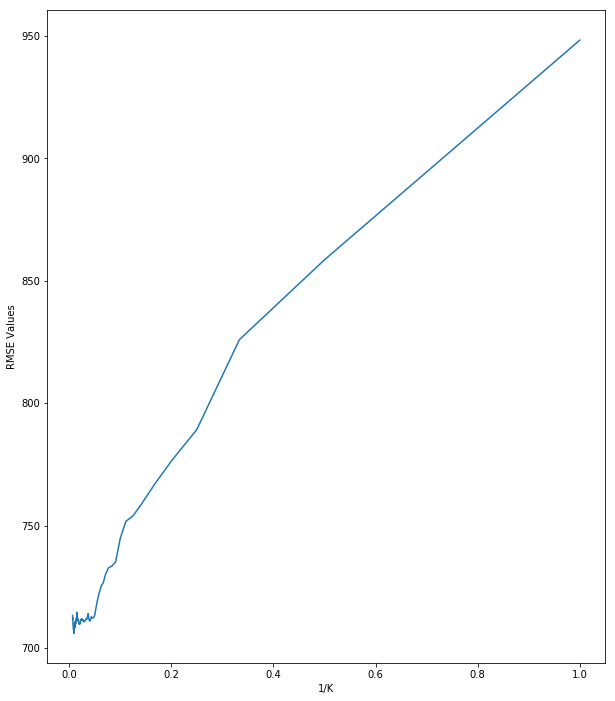

In [14]:
plt.figure(figsize=(10,12))
plt.plot(K,rmse_values)
plt.xlabel("1/K")
plt.ylabel("RMSE Values")